# Problem Statement No. 09

### 1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.drop('Id', axis = 1, inplace = True)

In [13]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [15]:
scale.fit(X)
X_new = scale.transform(X)

In [16]:
X_new = pd.DataFrame(X_new, columns = X.columns)

In [17]:
X_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [18]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2, random_state=40)

In [81]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [82]:
model.fit(X_train,y_train)

GaussianNB()

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
conf = confusion_matrix(y_test, y_pred)

In [86]:
conf

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

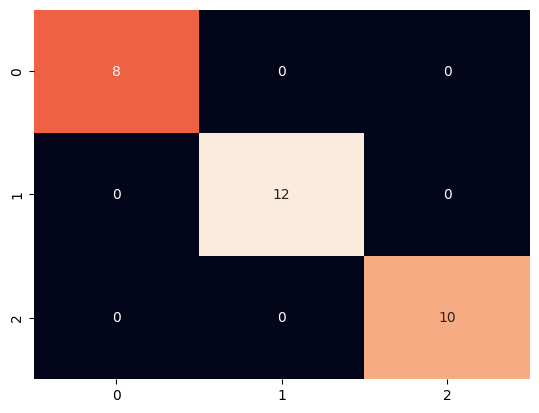

In [88]:
sns.heatmap(conf, annot=True, cbar = False)
plt.show()

In [89]:
report = classification_report(y_test, y_pred)

In [90]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [93]:
# So lets check cross validation score for our model
cv_scores = cross_val_score(model, X_new, y, cv=5)  
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV Score: 0.9533333333333334
